# 3.7.1 Cкин эффект

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [59]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [60]:
a = 0.045 / 2
delta = 0.0015
sigma = 5 * 10**7

mu_0 = 4 * m.pi * 10**-7

In [66]:
nus = [22, 33, 44, 55, 66, 77, 88, 99, 110, 121]

us = [182, 268, 347, 420, 486, 544, 595, 640, 679, 713]
us = [u * 0.001 for u in us]

Is  = [440, 437, 431, 425, 418, 410, 403, 396, 389, 382]
Is  = [i * 0.001 for i in Is]
xis = [us[i] / (nus[i] * Is[i]) for i in range(len(nus))]
xis

[0.018801652892561985,
 0.018584009430691356,
 0.018297827462560645,
 0.017967914438502673,
 0.0176163549369291,
 0.017231548938866012,
 0.01677757726144823,
 0.016324864809713294,
 0.015868193503154944,
 0.01542555493055255]

In [62]:
x = [nu**2 for nu in nus]
y = [1 / xi**2 for xi in xis]

4.420225443695324
52.87057259483988 2.1096267112075697


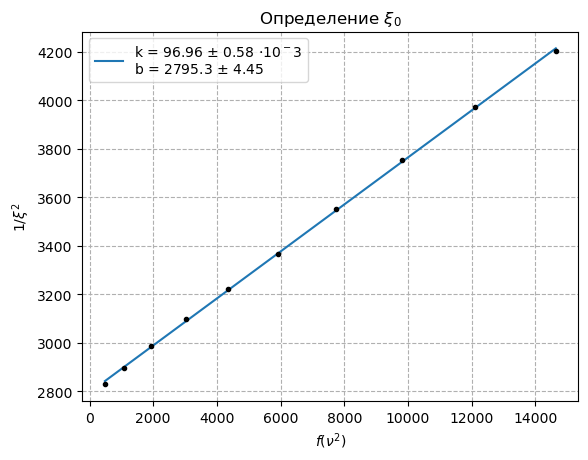

In [64]:
plt.figure()
plt.title("Определение $\\xi_0$")
plt.xlabel("$f(\\nu^2)$")
plt.ylabel("$1/\\xi^2$")

plt.grid(True, linestyle="--")
plt.errorbar(x, y, fmt=".k")

k, b, kerr, berr = LeastSquares(x, y)

x_tmp = np.array([min(x), max(x)])
plt.plot(x_tmp, k*x_tmp + b, label=f'k = {round(k*1000, 2)} $\\pm$ {round(kerr * 1000, 2)} $\\cdot 10^-3$\n' +
  f'b = {round(b, 2)} $\\pm$ {round(berr, 2)}')

sigma_ = m.sqrt(k / b) / m.pi / a / delta / mu_0
# xi_err = m.sqrt(kerr) / m.pi / a / delta / mu_0 / sigma
xi_0 = m.sqrt(b)
xi_0err = m.sqrt(berr)
print(sigma_ / 10**7)
print(xi_0, xi_0err)

plt.legend()
plt.show()